In [ ]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


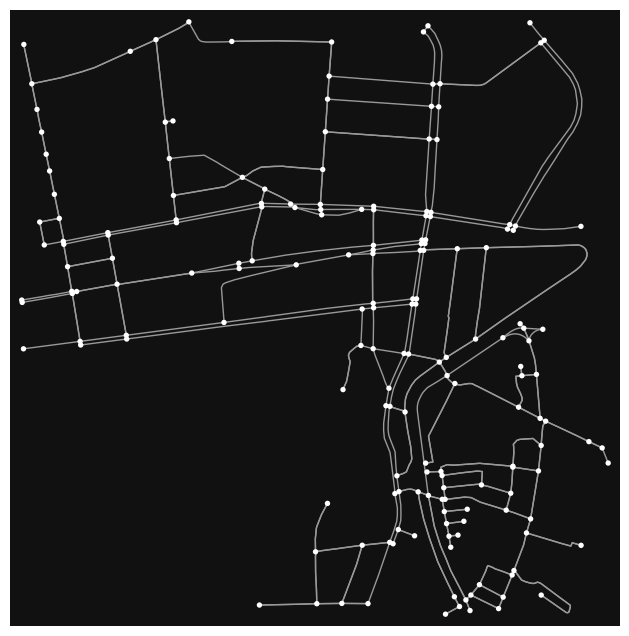

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
# 2024 update : distance was insteaded by dist
G = ox.graph_from_point((25.0528108,121.6137452), dist=750, network_type='drive')
ox.plot_graph(G)

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


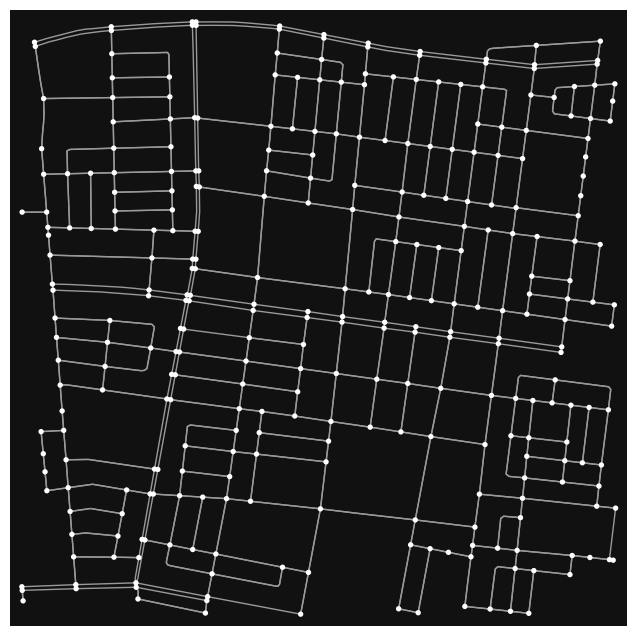

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [19]:
G = ox.graph_from_point((22.991155,120.170587), dist=750, network_type='drive')
ox.plot_graph(G)

In [10]:
center_node = ox.get_nearest_node(G, (22.991155,120.170587))

AttributeError: module 'osmnx' has no attribute 'get_nearest_node'

In [21]:
# 2024 update : ox.get_nearest_node was insteaded by ox.nearest_nodes
center_node = ox.nearest_nodes(G, 22.991155, 120.170587)

In [22]:
meters_per_minute = 10 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

In [15]:
import networkx as nx
trip_times = [5, 8, 12] #分鐘
# 給定顏色
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color # 抵達的node給顏色

AttributeError: module 'osmnx' has no attribute 'get_colors'

In [23]:
# 2024 update : ox.get_colors was insteaded by ox.plot.get_colors
import networkx as nx
trip_times = [5, 8, 12] #分鐘
# 給定顏色
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color # 抵達的node給顏色

<ipython-input-23-d8b32e40a672>:4: FutureWarning: The `return_hex` parameter has been deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)


In [24]:
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

TypeError: plot_graph() got an unexpected keyword argument 'fig_height'

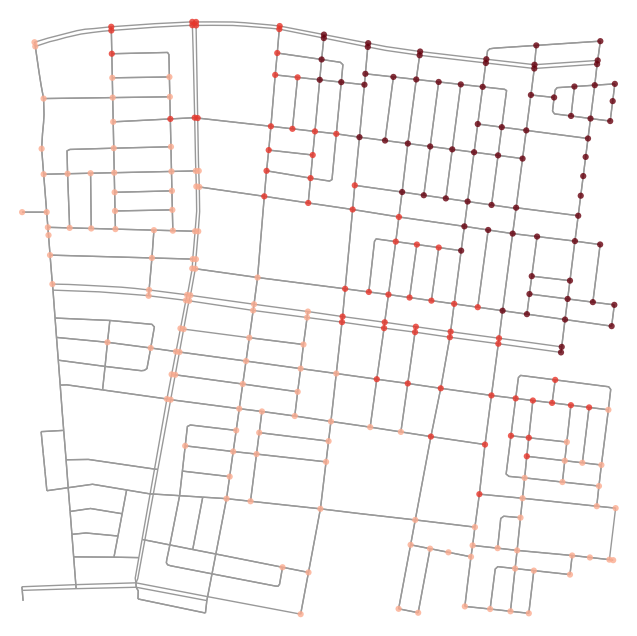

In [25]:
# 2024 update
import osmnx as ox
import matplotlib.pyplot as plt

# Create a figure and axes with desired size
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size here

# Plot the graph on the axes
ox.plot_graph(G, ax=ax, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2, show=False, close=False)

plt.show() # Display the plot